In [2]:
import keras
import cv2
from keras.models import load_model


from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import os

Using TensorFlow backend.


# Load Model

In [3]:
# load model
model = load_model('best_model_100ep_again.h5')

In [51]:
classes= 20
img_width, img_height = 150, 150
classes_list=['aeroplane', 'bicycle', 'table', 
              'dog', 'horse', 'motorbike', 
              'person', 'plant', 'sheep', 
              'sofa', 'train', 'TVmonitor', 
              'bird', 'boat', 'bottle', 
              'bus', 'car', 'cat', 'chair', 'cow']
print(len(classes_list))

20


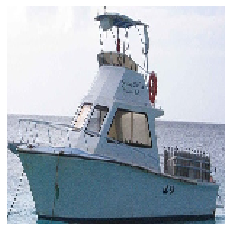

boat


In [52]:
def load_image(img_path, show=True):

    img = image.load_img(img_path, target_size=(150, 150))
    img_tensor = image.img_to_array(img)                    # (height, width, channels)
    img_tensor = np.expand_dims(img_tensor, axis=0)         # (1, height, width, channels), add a dimension because the model expects this shape: (batch_size, height, width, channels)
    img_tensor /= 255                                      # imshow expects values in the range [0, 1]

    if show:
        plt.imshow(img_tensor[0])                           
        plt.axis('off')
        plt.show()

    return img_tensor


if __name__ == "__main__":

    # load model
   # model = load_model('best_model.h5')

    # image path
    #img_path = '0.jpg'
    #img_path = '1.jpg'
    #img_path = '2.jpg'
    #img_path = '3.jpg'
    #img_path = '45.jpg'
    #img_path = '5.jpg'
    img_path = '6.jpg'
    #img_path = '7.jpg'
    #img_path = '8.jpg'
    #img_path = '9.jpg'
    #img_path = '10.jpg'
    
    #img_path = '12.jpg'
    #img_path = '13.jpg'
    #img_path = '14.jpg'
    #img_path = '15.jpg'
    #img_path = '16.jpg'
    #img_path = '17.jpg'
    #img_path = '18.jpg'    
    #img_path = '19.jpg' 
    #img_path = '67.jpg' 
    #img_path = 'bird.jpg' 
    #img_path = 'bird2.jpg' 
    #img_path = 'horse2.jpg' 
    #img_path = 'dog2.jpg' 
    #img_path = 'cat2.jpg' 
    #img_path = 'sofa3.jpg'
    img_path = 'boat.jpg'
    
    # loading image
    new_image = load_image(img_path)

    # prediction model
    pred = model.predict(new_image)
    print(classes_list[np.argmax(pred)])
    

# VideoCapture

In [10]:
import cv2

In [11]:
def recognition(img):   
    resized_img = cv2.resize(img, (150, 150)) 
    img = resized_img.reshape(1,150,150,3)
    img = img.astype('float32')
    img /= 255
    preds = model.predict(img)

    labels = ['aeroplane', 'bicycle', 'table', 
              'dog', 'horse', 'motorbike', 
              'person', 'plant', 'sheep', 
              'sofa', 'train', 'TVmonitor', 
              'bird', 'boat', 'bottle', 
              'bus', 'car', 'cat', 'chair', 'cow']

  #  labels = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
    ind = preds[0].argmax()
    acc = round(preds[0][ind]*100,2)
    if acc > 75:
        res = ""+str(labels[ind])+", "+str(acc) +"%"
    else:
        res= "0, 0%"
    return res

In [18]:
cap = cv2.VideoCapture(0)

while(True):
    # Capture frame-by-frame
    ret, frame = cap.read()
    crop_cap = frame[200:300,300:400]
    text = recognition(crop_cap)
    cv2.putText(frame,text,(100,100), cv2.FONT_HERSHEY_SIMPLEX, 1,(255,0,0),1,cv2.LINE_AA)
    cv2.imshow('Objects', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()